# Homework #0 (Due 09/10/2020, 11:59pm)
## Review of Stastistical Modeling and Scientific Computing

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2020**

**Name:** Assaraf David

**Students collaborators:**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. ***Portions of your submission that contains syntactic or run-time errors will not be graded***.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: Maximum Likelihood Estimators for Linear Regression
### (Material covered in CS109A or equivalent)
In this problem, you are given a dataset with a single predictor $X$ and a single outcome $y$, and your task is to fit a linear model to the data. The dataset is saved as `HW0_data.csv` in CSV (Comma Separated Values) format and can be read using the `.read_csv()` function from the `pandas` library.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)
\end{aligned}
where $w_1$ and $w_0$, the *parameters* of the function $f$, are unknown constants. 

1. **(Model Building)** Write the analytical expression for the likelihood function $p(y|x, w_1, w_0)$, for a single observation $(x, y)$. Write the analytical expression for the likelihood function $\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations. 

  *Hint: for a given $x$ and fixed parameters, what is the distribution of $y$?*

 Since $\epsilon \sim \mathcal{N}(0, 0.5), \quad y|(x, w_1, w_0) \sim \mathcal{N}(w_1*x+w_0, 0.5)$. Therefore, 
 \begin{equation*}
 p(y|x, w_1, w_0) = \frac{1}{\sqrt{\pi}}*e^{-(y-w_1*x-w_0)^2}
 \end{equation*}
 For an entire dataset of N observations, we have 
 \begin{equation*}
  \prod_{n=1}^N p(y_n|x_n, w_1, w_0) = \frac{1}{\pi^\frac{N}{2}}e^{-\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2}}
 \end{equation*}

2. **(Defining a Learning Objective)** The Maximum Likelihood Estimators (MLE) of $w_1$ and $w_0$ are defined as
\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0)
\end{aligned}
Show that finding $w_1$ and $w_0$ that maximizes the likelihood is equivalent to finding parameters that minimize the Mean Squared Error (MSE) of your model.<br><br>
*Hint: show that maximizing the log likelihood is equivalent to minimizing the MSE.*

Since the log function is strictly monotonous, maximizing a function is equivalent to maximizing the log of this function. Therefore, our problem is equivalent to: 
\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; log(\prod_{n=1}^N p(y_n|x_n, w_1, w_0))
\end{aligned}
Therefore, we are looking to optimize:
\begin{equation*}
 log(\prod_{n=1}^N p(y_n|x_n, w_1, w_0)) = log(\frac{1}{\pi^\frac{N}{2}}e^{-\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2}}) 
\end{equation*}
The resulting objective function to maximize is 
\begin{equation*}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; -\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2} - \frac{N}{2}log(\pi)
\end{equation*}
Since the second term is a constant, and dividing the sum by a constant does not change the location of its optima, the problem we are trying to solve is  
\begin{equation*}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \frac{-}{N}\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2} = \underset{w_1, w_0}{\mathrm{argmin}}\; \frac{1}{N}\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2} 
\end{equation*}
Therefore, maximizing the likelihood of $w_1$ and $w_O$ given this dataset and **assuming on a gaussian error distribution** is equivalent to finding parameters the minimise the MSE of the model.

3. **(Model Fitting)** Analytically derive the formulae for MLE of $w_1$ and $w_0$. Describe what information you would need in order ***prove*** that the parameters you derived maximizes the likelihood (or minimizes the MSE)?

  **Optional but Useful:** express your derivation of the MLE in matrix notation (i.e. [perform matrix calculus](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

  *Hint: this part requires multivariate calculus.*

For every data point, we write $X_i$ = [1,  $x_i$]. Our Dataset is written X = $[X_1, ..., X_n]^T$. Therefore, X is of size $(n,2)$. We write the objective vector $y = [y_1, ..., y_n]^T$: shape $(n, 1)$. Last, we write $w = [w_0, w_1]^T$.

Our problem can be written: 
\begin{equation*}
\underset{w}{\mathrm{argmin}}\; \frac{1}{N}||y-Xw||^2 = \mathcal{L}(w)
\end{equation*}
where $||x||_{\mathcal{R^n}}$ is defined as the standard euclidian norm.

Therefore, since this functional is convex $\mathcal{L}$ and $C^{1}$, we can compute its gradient and find its zeros in order to find the minimum of this function. 
\begin{equation*}
\nabla\mathcal{L} = X^T(y-Xw)
\end{equation*}
Therefore, we solve 
\begin{equation*}
\nabla\mathcal{L} = 0 \iff X^T(y-Xw) = 0 \iff X^TXw=X^Ty
\end{equation*}
Therefore, under the condition that the matrix $X$ is non singular:
\begin{equation*}
w^{MLE} = (X^TX)^{-1}X^Ty
\end{equation*}

4. **(Model Evaluation)** Using the `LinearRegression` class from `sklearn.linear_model`, fit a linear regression model to the dataset in `HW0_data.csv`. When you call the `.fit()` function of `LinearRegression`, the default is to find parameters that minimize MSE.

  Visualize the linear function you fitted as well as the data in one plot. 
  Visualize a histogram of the residuals.
  Using both plots, argue for whether or not your model is appropriate for the data.
  
  *Hint: look at the assumptions you've made in your modeling process, which assumptions are supported by the data, which are contradicted by the data?*

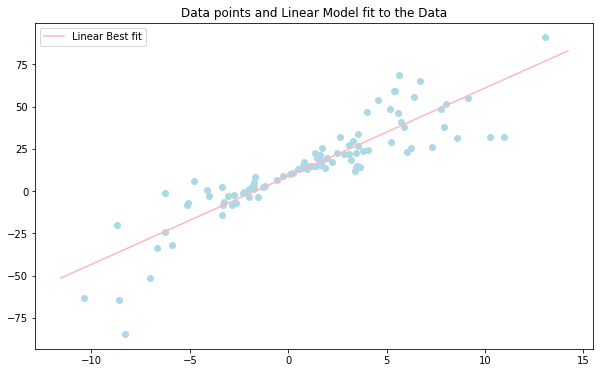

In [2]:
data = pd.read_csv('HW0_data.csv')
X = data['x'].values.reshape(-1, 1)
y = data['y'].values
lr = LinearRegression().fit(X, y)
intercept = lr.intercept_
slope= lr.coef_
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightblue')
plt.title('Data points and Linear Model fit to the Data')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='lightpink', label='Linear Best fit')
plt.legend()

In [3]:
print('The coefficients predicted here are:', (intercept, float(slope)))

The coefficients predicted here are: (8.863400189176229, 5.216305236234976)


Text(0.5, 1.0, 'Residual Plot')

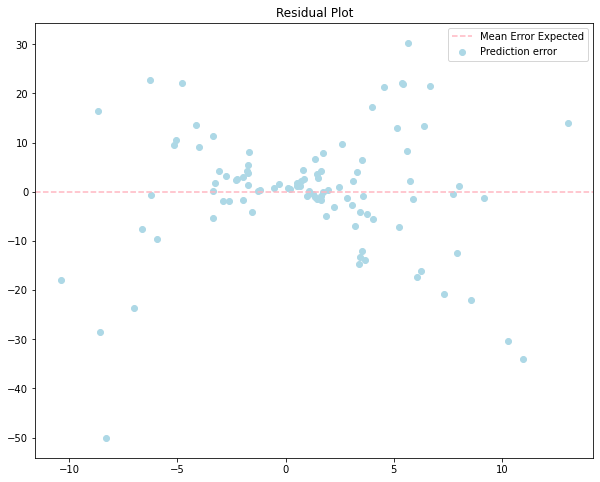

In [4]:
y_preds = intercept + slope*X
y_true = y.reshape(-1, 1)
errs = np.array(y_true)-np.array(y_preds)
plt.figure(figsize=(10, 8))
plt.scatter(X, errs, color='lightblue', label='Prediction error')
plt.axhline(y=0, linestyle='--', color='lightpink', label='Mean Error Expected')
plt.legend()
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residuals Distribution')

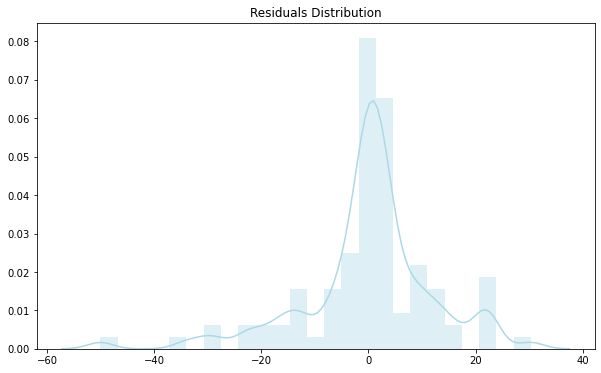

In [5]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(errs, color="lightblue", label="Compact")
plt.title('Residuals Distribution')

The previous plots taught us several things:
- It is acceptable to assume the linear model to capture the relationship between the features and the target and the database (Figure 1)
- It is acceptable to assume that the errors have a Gaussian Distribution (Figure 3)
- It is acceptable to assume that the errors are centered (Figure 2 and 3)

Those are the most important hypotheses made in the Linear Model. I would argue in that case that the **linear** model is appropriate for the data. 
 
 
 However, the standard deviation of the errors seem quite underestimated, we need to have a closer look at this parameter.

5. **(Uncertainty Quantification)** Compute the 95% [Confidence Interval (CI)](https://stattrek.com/estimation/confidence-interval.aspx) of the parameters you estimated for the dataset in `HW0_data.csv` by bootstrapping (this requires you to access the model parameters of the `LinearRegression` class). How confident are you in the 'correctness' or 'reliability' of your parameter estimates given the CI's?

  Compute the [Predictive Interval (PI)](https://otexts.com/fpp2/prediction-intervals.html) of a single prediction at $x=2$ by bootstrapping. How confident are you in your prediction for $x=2$ given the PI?
  
  *Hint: bootstrapping is the process of (1) generating multiple datasets (with equal size as the training data) that are similarly distributed as your training data by sampling your data with replacement, (2) estimating a quantity of interest repeatedly using these datasets. You can then empirically compute the percentile of interest from the bootstrap estimates of your quanity of interest.* 
  
  *Generating samples from your training data can be done using the `.sample()` function of the `pandas` `DataFrame` class.*
  
  *Computing percentiles of samples can be done using the `.percentile()` function of the `numpy` library.*

### Confidence Interval

In [6]:
data = pd.read_csv('HW0_data.csv')
intercept_bootstraped = []
slope_bootstraped = []
for i in range(1000):
    data_bootstrapped = data.sample(frac=1., replace=True)
    X = data_bootstrapped['x'].values.reshape(-1, 1)
    y = data_bootstrapped['y'].values
    lr = LinearRegression().fit(X, y)
    intercept = lr.intercept_
    slope= lr.coef_
    intercept_bootstraped.append(intercept)
    slope_bootstraped.append(slope)
intercept_model = 8.863400189176229
slope_model = 5.216305236234976

In [7]:
lower_intercept = np.percentile(intercept_bootstraped, 2.5)
upper_intercept = np.percentile(intercept_bootstraped, 97.5)

In [8]:
lower_slope = np.percentile(slope_bootstraped, 2.5)
upper_slope = np.percentile(slope_bootstraped, 97.5)

In [9]:
print('The 95% CI for the intercept is', (lower_intercept, upper_intercept))
print('The 95% CI for the slope is', (lower_slope, upper_slope))

The 95% CI for the intercept is (6.303720926616007, 11.51209186247727)
The 95% CI for the slope is (4.414595610791313, 6.093568498865746)


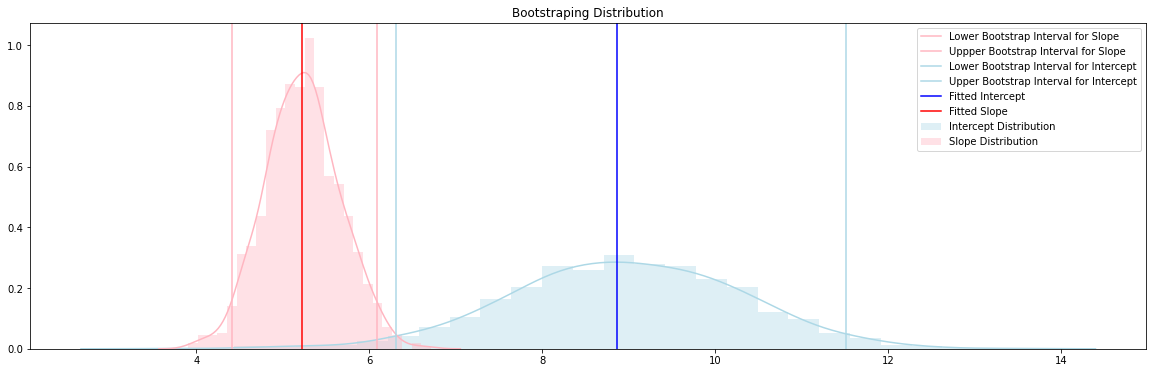

In [10]:
plt.figure(figsize=(20, 6))
sns.distplot(intercept_bootstraped, color="lightblue", label="Intercept Distribution")
sns.distplot(slope_bootstraped, color='lightpink', label='Slope Distribution')
plt.title('Bootstraping Distribution')
plt.axvline(lower_slope, color='lightpink', label='Lower Bootstrap Interval for Slope')
plt.axvline(upper_slope, color='lightpink', label='Uppper Bootstrap Interval for Slope')
plt.axvline(lower_intercept, color='lightblue', label='Lower Bootstrap Interval for Intercept')
plt.axvline(upper_intercept, color='lightblue', label='Upper Bootstrap Interval for Intercept')
plt.axvline(intercept_model, color='blue', label='Fitted Intercept')
plt.axvline(slope_model, color='red', label='Fitted Slope')
plt.legend()

According to the plots, the paramater estimate is **reliable**.

### Predictive Interval

The Predictive interval at $x=2$ is computed as $[intercept_{lower} + x*slope_{lower}; intercept_{upper} + x*slope_{upper}]$ 

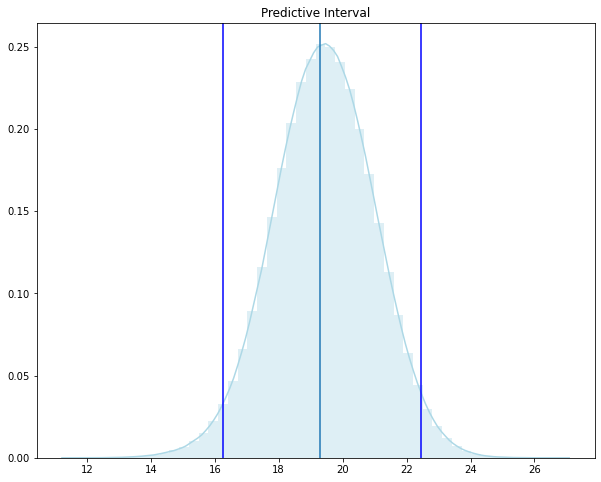

In [11]:
predicted_bootstraped = 2*np.asarray(slope_bootstraped)+intercept_bootstraped
lower_percentile_bootstraped = np.percentile(predicted_bootstraped, 2.5)
upper_percentile_bootstraped = np.percentile(predicted_bootstraped, 97.5)
plt.figure(figsize=(10, 8))
plt.title('Predictive Interval')
sns.distplot(predicted_bootstraped, color='lightblue', label='Predictive Interval')
plt.axvline(lower_percentile_bootstraped, color='blue', label='Percentile')
plt.axvline(upper_percentile_bootstraped, color='blue', label='Percentile')
plt.axvline(intercept_model+2*slope_model)

In the same way at what precedes, I am confident with the prediction at $x=2$.

## Part II: Bayesian Linear Regression
### (Material covered in CS109 B or equivalent)
In this problem, your task is to perform Bayesian linear regression on the dataset in `HW0_data.csv`.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)\\
w_0 &\sim \mathcal{N}(0, 1)\\
w_1 &\sim \mathcal{N}(0, 0.5)
\end{aligned}
In this model, we assume the same likelihood as in Part I, but we also include priors for $w_0$ and $w_1$: $p(w_0) = \mathcal{N}(0, 1)$, $p(w_1) = \mathcal{N}(0, 0.5)$

1. **(Inference)** Analytically derive the joint posterior distribution over the parameters. That is, analytically compute<br><br>
\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}.\\
\end{aligned}
<br>*Hint: The posterior of a model with a Gaussian (or normal) likelihood and Gaussian priors is yet again Gaussian. This derivation is included in many machine learning textbooks like Machine Learning: a Probabilistic Perspective by Murphy or Pattern Recognition and Machine Learning by Bishop. This derivation also appears online in many course notes - you are welcomed to use any and all available resources.*

The constant will not be computed right now, it will be the normalization constant from the posterior distribution. 
We have:
\begin{equation*}
p(w_0) = \frac{1}{\sqrt{2\pi}}e^{-\frac{w_0^2}{2}}, \quad
p(w_1) = \frac{1}{\sqrt{\pi}}e^{-w_1^2}
\end{equation*}
Therefore, with the above equation of the likelihood, we have:
\begin{equation*}
\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0) = \frac{1}{\sqrt{2}}\pi^{-\frac{N}{2}-1}e^{-\frac{w_0^2}{2}-w_1^2-\sum_{n=1}^N{(y_n-w_1*x_n-w_0)^2}}
\end{equation*}
I will focus on the argument of the exponential. With $w=(w_0, w_1)$, I want to end up with an expression that would look like $e^{-\frac{1}{2}(w-\mu)^T\Sigma^{-1}(w-\mu)}$ where $\Sigma$ is the covariance matrix (SDP) and $\mu$ depends on $y$ and $x$.

In the following, I will call $S_x = \sum_{n=1}^Nx_i$, $S_y = \sum_{n=1}^Ny_i$, $D_x = \sum_{n=1}^Nx_i^2$, $D_y = \sum_{n=1}^Ny_i^2$, $P = \sum_{n=1}^Nx_iy_i$ and study the exponential's arguments.
The first exponential's argument can be rewritten as:
\begin{equation*}
    -\frac{1}{2}(w_1^2(2+2D_x) + w_0^2(2N+1) + 4w_0w_1S_x-4w_1P-4w_0S_y+2D_y)
\end{equation*}
Therefore, by an immediate identification, we can deduce that the matrix $\Sigma^{-1}$ is equal to:

\begin{bmatrix}
2N+1 & 2S_x\\
2S_x & 2 + 2D_x
\end{bmatrix}	

The last step in the parameter's identification is to find $\mu$.

By equalizing both arguments, we come up with a matrix equation verified by $\mu$.
\begin{equation*}
\Sigma^{-1}\mu = 2(S_y, P)^T
\end{equation*}
Therefore, after calculation, we have:
\begin{equation*}
\mu = \frac{1}{(2N+1)(1+D_x))-2S_x^2}(2(1+D_x)S_y-2S_xP, -2S_xS_y+(2N+1)P)
\end{equation*}

Finally, $w=(w_0, w_1)\sim \mathcal{N}(\mu, \Sigma)$ where 
$\Sigma$ is $\frac{1}{(2N+1)(1+\sum_{n=1}^Nx_i^2)-2(\sum_{n=1}^Nx_i)^2}$
$\begin{pmatrix}
2N+1 & 2\sum_{n=1}^Nx_i\\
2\sum_{n=1}^Nx_i & 2 + 2\sum_{n=1}^Nx_i^2
\end{pmatrix}	$

and $\mu$ is $\frac{1}{(2N+1)(1+\sum_{n=1}^Nx_i^2)-2(\sum_{n=1}^Nx_i)^2}$
$\begin{pmatrix}
2(1+\sum_{n=1}^Nx_i^2)(\sum_{n=1}^Ny_i)-2(\sum_{n=1}^Nx_i)(\sum_{n=1}^Nx_iy_i)\\
 -2(\sum_{n=1}^Nx_i)(\sum_{n=1}^Ny_i)+(2N+1)(\sum_{n=1}^Nx_iy_i)
\end{pmatrix}	$

2. **(Model Interpretation)** Visualize the ***joint posterior*** over the parameters, $p(w_1, w_0 | y, x)$ for the dataset in `HW0_data.csv` (you may use a scatter plot of samples drawn from the posterior or a contour map/heat map of the pdf). In separate plots, visualize the ***marginal posterior*** distribution over each parameter,
\begin{aligned}
p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_0\\
p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_1\\
\end{aligned}
Is the information contained in the joint posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$ equivalent to the information contained in the two marginals $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n), p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$? That is, what does each distribution tell you?

  *Hint: it is not necessary to analytically derive the marginals $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. Recall that you can perform marginalization of a variable by sampling from the joint distribution and disregarding that variable.*

### Joint Distribution

In [12]:
S_x = np.sum(X)
N = len(X)
y = y.reshape(-1, 1)
S_y = np.sum(y)
P = np.sum(X*y)
D_x = np.sum(X**2)
D_y = np.sum(y**2)
Sigma_inv = np.matrix([[2*N+1, 2*S_x], [2*S_x, 2+2*D_x]])
Sigma = np.linalg.inv(Sigma_inv)
mu = np.linalg.solve(-Sigma_inv, np.array([S_y, P]))
print(mu)

[-5.02283002 -2.74974214]


In [13]:
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

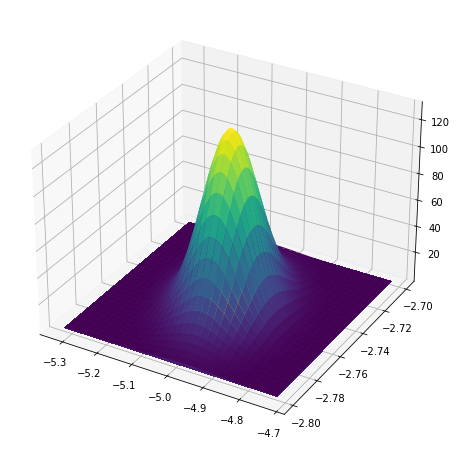

In [21]:
from matplotlib import cm
N = 100
X_range = np.linspace(mu[0]-0.3, mu[0]+0.3, N)
Y_range = np.linspace(mu[1]-0.05, mu[1]+0.05, N)
X_figure, y_figure = np.meshgrid(X_range, Y_range)
pos = np.empty(X_figure.shape + (2,))
pos[:, :, 0] = X_figure
pos[:, :, 1] = y_figure
Z = multivariate_gaussian(pos, mu, Sigma)
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(X_figure, y_figure, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X_figure, y_figure, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
plt.show()

### Marginal Distribution

#### For $w_0$

Text(0.5, 1.0, 'Marginal Distribution of $w_0$')

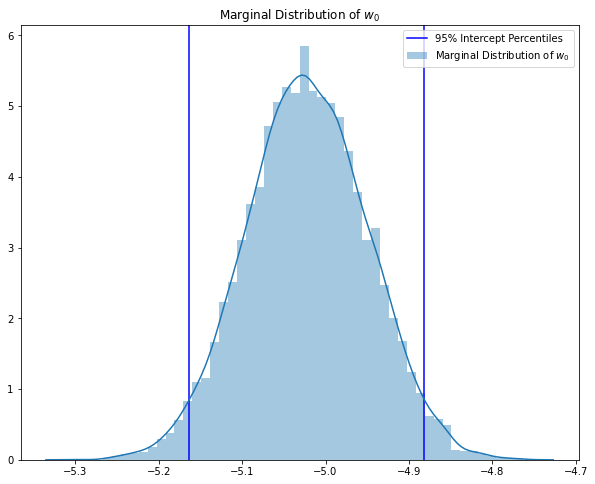

In [15]:
samples = np.random.multivariate_normal(mu, Sigma, 10000)
samples_0 = samples[:,0]
lower_intercept_posterior = np.percentile(samples_0, 2.5)
upper_intercept_posterior = np.percentile(samples_0, 97.5)
plt.figure(figsize=(10, 8))
plt.axvline(lower_intercept_posterior, color='blue', label='95% Intercept Percentiles')
plt.axvline(upper_intercept_posterior, color='blue')
sns.distplot(samples_0, label='Marginal Distribution of $w_0$')
plt.legend()
plt.title('Marginal Distribution of $w_0$')

#### For $w_1$

In [16]:
samples_1 = samples[:, 1]
lower_slope_posterior = np.percentile(samples_1, 2.5)
upper_slope_posterior = np.percentile(samples_1, 97.5)

Text(0.5, 1.0, 'Marginal Distribution of $w_1$')

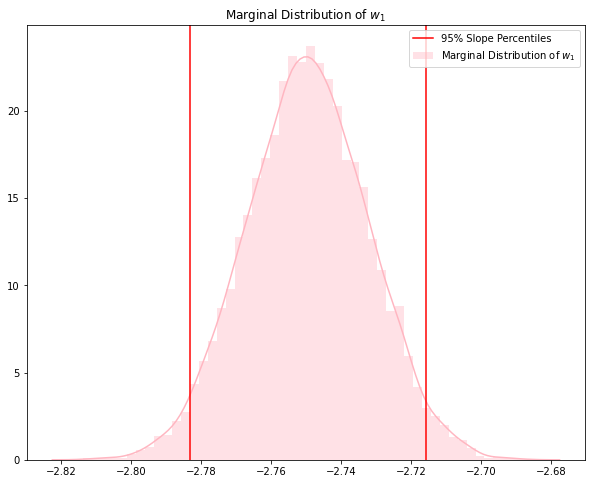

In [17]:
plt.figure(figsize=(10, 8))
sns.distplot(samples_1, label='Marginal Distribution of $w_1$', color='lightpink')
plt.axvline(lower_slope_posterior, color='red', label='95% Slope Percentiles')
plt.axvline(upper_slope_posterior, color='red')
plt.legend()
plt.title('Marginal Distribution of $w_1$')

The information contained in the joint distribution **is not** equivalent to the ones contained in the marginals. It would be if both distributions were independent (which isn't the case here since $\Sigma$ is not diagonal).


3. **(Prediction)** In Bayesian linear regression, we obtain a distribution over possible parameters given the data, $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, rather than a single ***point-estimate*** of the 'best' parameters. This means that when we predict an outcome for, say, $x=2$ we get a distribution over possible values of $y$ rather than a single $y$. The distribution over the predicted $y$ for a given $x$ is called the ***posterior predictive***, and is denoted $p(y|x)$.

  Visualize the posterior predictive $p(y|x)$ at $x=2$ for the dataset in `HW0_data.csv`as a histogram. 

  *Hint: randomly sample possible parameters from the posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$. Each sample represents a linear function $f(x)$. Make a prediction at $x=2$ using each $f(x)$.*

<AxesSubplot:title={'center':'Distribution of the Posterior Predictive at $x=2$'}>

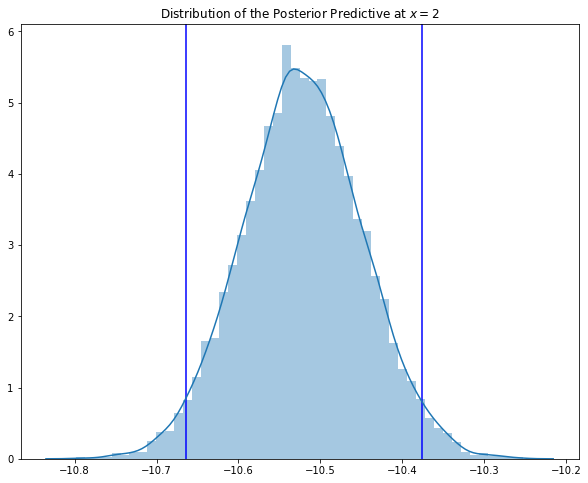

In [18]:
predictives_values = samples_0 + 2*samples_1
lower_posterior_predictive = np.percentile(predictives_values, 2.5)
upper_posterior_predictive = np.percentile(predictives_values, 97.5)
plt.figure(figsize=(10, 8))
plt.axvline(lower_posterior_predictive, color='blue', label='Percentiles')
plt.axvline(upper_posterior_predictive, color='blue', label='Percentiles')
plt.title('Distribution of the Posterior Predictive at $x=2$')
sns.distplot(predictives_values)

## Part III: Comparison

You've now modeled the same set of data using non-Bayesian and Bayesian regression models. In both paradigms it's possible to identify a 'best' set of model parameters (in the non-Bayesian approach, we compute the MLE; in the Bayesian approach, we can compute the mean or mode of the posterior). In both paradigms it is possible to get a sense of the uncertainty we have about our estimates of the parameter and our predictions. 

1. Compute the 95 percentile interval of the marginal posterior distributions $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$  for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$). Compare these intervals to the CI's you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the parameters?

In [19]:
# 95 percentile interval for the marginal posterior distributions
width_intercept_posterior = np.abs(lower_intercept_posterior-upper_intercept_posterior)
width_slope_posterior = np.abs(lower_slope_posterior-upper_slope_posterior)
# 95 percentile interval for the estimated CI's
width_intercept = np.abs(lower_intercept-upper_intercept)
width_slope = np.abs(lower_slope-upper_slope)
#Differences
print((width_intercept-width_intercept_posterior)/width_intercept_posterior)
print((width_slope-width_slope_posterior)/width_slope_posterior)


17.488960472197558
23.899228486657165


The difference between intervals is **very significant**. The CI's computed in Part I are much wider. This means that the first model is uncertain about the parameter estimation, resulting from the fact that we do not have very much data (100 points).

2. Compute the 95 percentile interval of posterior predictive at $x=2$ for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(y| x=2)$). Compare this interval to the PI you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the prediction?

In [20]:
width_PI_bootstraped = np.abs(lower_percentile_bootstraped - upper_percentile_bootstraped)
width_Posterior_Predictive = np.abs(lower_posterior_predictive - upper_posterior_predictive)
print((width_PI_bootstraped-width_Posterior_Predictive)/width_Posterior_Predictive)

20.480516721553307


Once again, the PI is significantly wider. This means that the first model is more uncertain about the prediction than the second, where we added some information. 